In [1]:
# Importing essential libraries.
from data_imports import *
from data_clean import data, time_based

In [95]:
# Importing machine-learning libraries.
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
clean_df = data()
time_df = time_based(data())

In [98]:
def HGBR(input_data, var):
    # Seperating the dataframes based on missing O3 values and assinging to variables.
    df_missing = input_data[input_data[var].isnull()]
    df_not_missing = input_data.dropna(subset = [var])

    # Seperating features and target variable.
    X = df_not_missing.drop(columns = [var])
    y = df_not_missing[var]
    
    # Splitting the data into train and testing subsets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    # Training the model.
    clf = HistGradientBoostingRegressor(random_state = 1)
    clf.fit(X_train, y_train)

    # Predictions on the training set.
    y_train_pred = clf.predict(X_train)

    # Predictions on the test set.
    y_test_pred = clf.predict(X_test)
    
    # Calculating regression metrics for the training set.
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mse_train ** 0.5
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculating regression metrics for the test set.
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print training set regression metrics.
    print(f'Training Set - MSE: {mse_train:8.5f}, RMSE: {rmse_train:8.5f}, MAE: {mae_train:8.5f}, R2: {r2_train:8.5f}')

    # Print test set regression metrics.
    print(f'Testing Set  - MSE: {mse_test:8.5f}, RMSE: {rmse_test:8.5f}, MAE: {mae_test:8.5f}, R2: {r2_test:8.5f}')

In [99]:
HGBR(clean_df, 'O3_ppbV')

Training Set - MSE: 11.54945, RMSE:  3.39845, MAE:  2.59046, R2:  0.78803
Testing Set  - MSE: 12.02467, RMSE:  3.46766, MAE:  2.65498, R2:  0.77958


In [85]:
HGBR(time_df, 'O3_ppbV')

Training Set - MSE:  9.81079, RMSE:  3.13222, MAE:  2.41302, R2:  0.81994
Testing Set  - MSE: 10.33440, RMSE:  3.21472, MAE:  2.47751, R2:  0.81056


In [101]:
range_O3 = time_df['O3_ppbV'].max() - time_df['O3_ppbV'].min()
print(range_O3)
print(time_df['O3_ppbV'].max())
print(time_df['O3_ppbV'].min())
print(time_df['O3_ppbV'].mean())

51.0
58.2
7.2
32.86906356704848


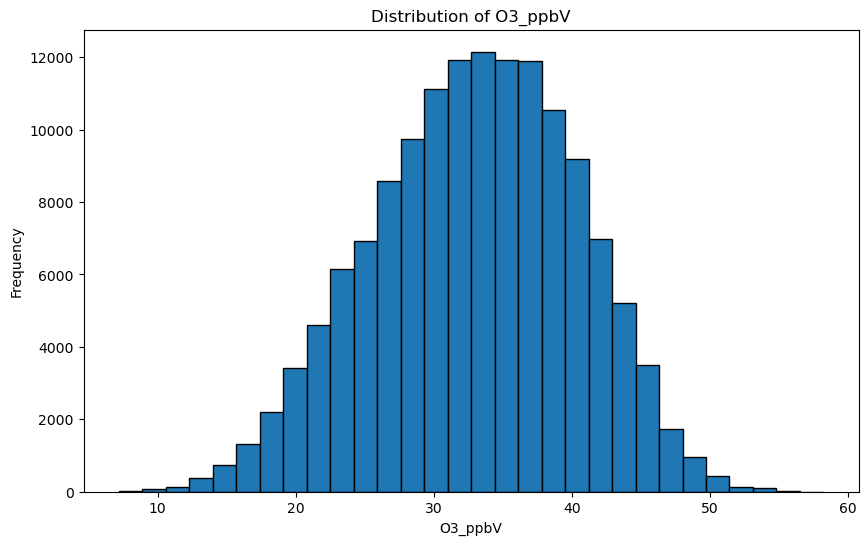

In [69]:
plt.figure(figsize=(10, 6))  
plt.hist(time_df['O3_ppbV'], bins=30, edgecolor='black')

plt.title('Distribution of O3_ppbV')
plt.xlabel('O3_ppbV')
plt.ylabel('Frequency')

plt.show()